## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

pd.set_option('display.max_columns', None)

## Load the dataset

In [2]:
df= pd.read_csv('RTA Dataset (1).csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.shape

(12316, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
#Statistical summary of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


## Data Cleaning and Validation

In [6]:
# check for missing values
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [7]:
# Shows number of duplicate rows
df.duplicated().sum()

0

### Columns with missing values

In [8]:
# Check the percentage of missing values in each feature
missing_percent= df.isnull().mean()*100

# filter features with missing data
missing_data= missing_percent[missing_percent>0]
missing_data

Educational_level           6.016564
Vehicle_driver_relation     4.701202
Driving_experience          6.731082
Type_of_vehicle             7.713543
Owner_of_vehicle            3.913608
Service_year_of_vehicle    31.893472
Defect_of_vehicle          35.945112
Area_accident_occured       1.940565
Lanes_or_Medians            3.126015
Road_allignment             1.152972
Types_of_Junction           7.202014
Road_surface_type           1.396557
Type_of_collision           1.258525
Vehicle_movement            2.500812
Work_of_casuality          25.966223
Fitness_of_casuality       21.394933
dtype: float64

In [10]:
# Dropping Type_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Work_of_casuality and Fitness_of_casuality 
columns_to_drop = ['Type_of_vehicle', 'Service_year_of_vehicle', 
                   'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']

df = df.drop(columns=columns_to_drop, axis=1)

In [11]:
# Check the percentage of missing values in each feature
missing_percent= df.isnull().mean()*100

# filter features with missing data
missing_data= missing_percent[missing_percent>0]
missing_data

Educational_level          6.016564
Vehicle_driver_relation    4.701202
Driving_experience         6.731082
Owner_of_vehicle           3.913608
Area_accident_occured      1.940565
Lanes_or_Medians           3.126015
Road_allignment            1.152972
Types_of_Junction          7.202014
Road_surface_type          1.396557
Type_of_collision          1.258525
Vehicle_movement           2.500812
dtype: float64

In [12]:
# Select categorical columns
categorical_cols= df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

#### Check for inconsistent entries

In [13]:
# display unique values to check for inconsistencies
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())

Unique values in Time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Unique values in Day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Unique values in Age_band_of_driver:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Unique values in Sex_of_driver:
['Male' 'Female' 'Unknown']
Unique values in Educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Unique values in Vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other']
Unique values in Driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Unique values in Owner_of_vehicle:
['Owner' 'Governmental' nan 'Organization' 'Other']
Unique values in Area_accident_occured:
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Unknown' 'Rural village areas' ' Outside r

In [14]:
# All the columns with missing values are categorical)
#Fill the missing values in the categorical columns
for col in missing_data.index:
    df[col] = df[col].replace('unknown', 'Unknown')
    
    # If Unknown is present in the column, use it to fill the missing values
    if 'Unknown' in df[col].unique():
        df[col] = df[col].fillna('Unknown')

    # if Unknown is absent, fill the columns with the mode
    else:
        df[col] = df[col].fillna(df[col].mode()[0])       

In [15]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [16]:
df.to_csv('cleaned_data.csv', index=False)

# Exploratory Data Analysis

### Univariate Analysis

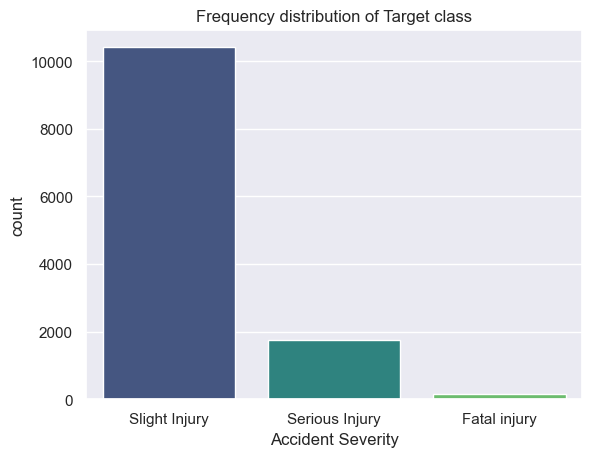

In [17]:
# Visualization of Frequency occurance of slight, serious and fatal injuries
ax= sns.countplot(x='Accident_severity', data=df, palette='viridis')
#for p in ax.patches:
    #ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 2))
plt.xlabel('Accident Severity')
plt.title('Frequency distribution of Target class')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

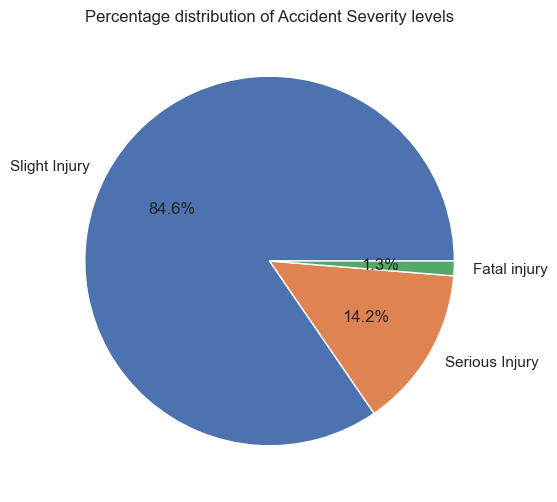

In [18]:
# Comaprison of Accident severity with pie charts

#Value count
severity_counts= df['Accident_severity'].value_counts()
labels= severity_counts.index

#Visualization
plt.figure(figsize=(8, 6))
plt.pie(severity_counts, labels =labels, autopct='%1.1f%%')
plt.title('Percentage distribution of Accident Severity levels')
plt.show


- As seen from the chart above, 84.6% of accidents result in slight injuries, while 1.3% are attributed to fatal injuries. From this, it is safe to say that most accident casualties did not end up with severe life-threatening injuries

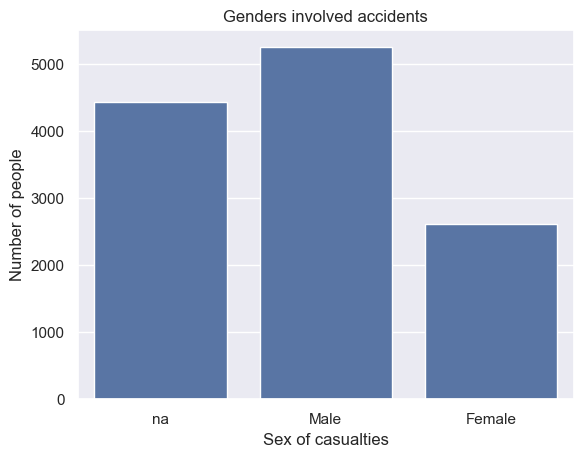

In [19]:
# Genders involved in accidents
sns.countplot(x='Sex_of_casualty', data=df)
plt.xlabel('Sex of casualties')
plt.ylabel('Number of people')
plt.title('Genders involved accidents')
plt.show()

More males were involved in Accidents that resulted in various injuries. The 'na' could represent people that do not identify with a particular gender

## Bivariate Analysis

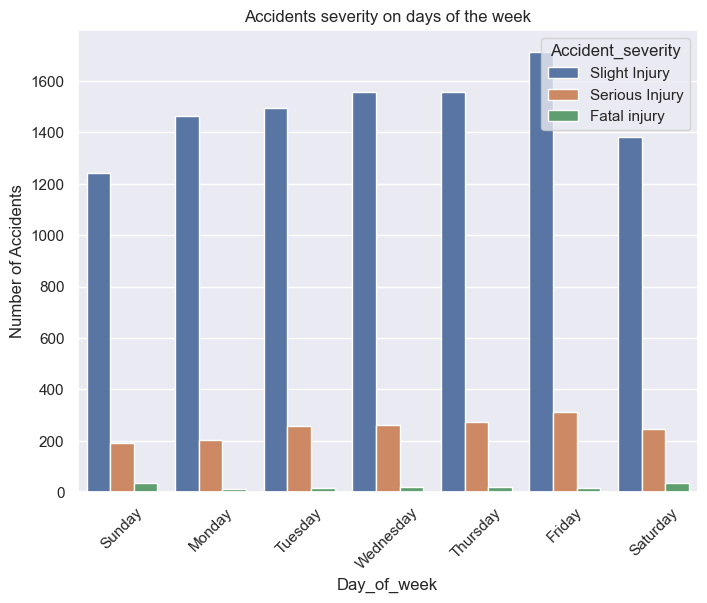

In [20]:
# Days of the week with more Accident severity (slight, serious, fatal)
ordered_days= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] 
plt.figure(figsize=(8,6))
sns.countplot(x='Day_of_week', hue='Accident_severity', order=ordered_days, data=df)
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.title('Accidents severity on days of the week')
plt.show()


More Accidents resulting in slight and serious injuries occured on friday, whereas fatal injuries were slighthly more common on Saturday, though they accounted for a small percentage overall

In [21]:
#df['Age_band_of_driver'].value_counts(normalize=True)

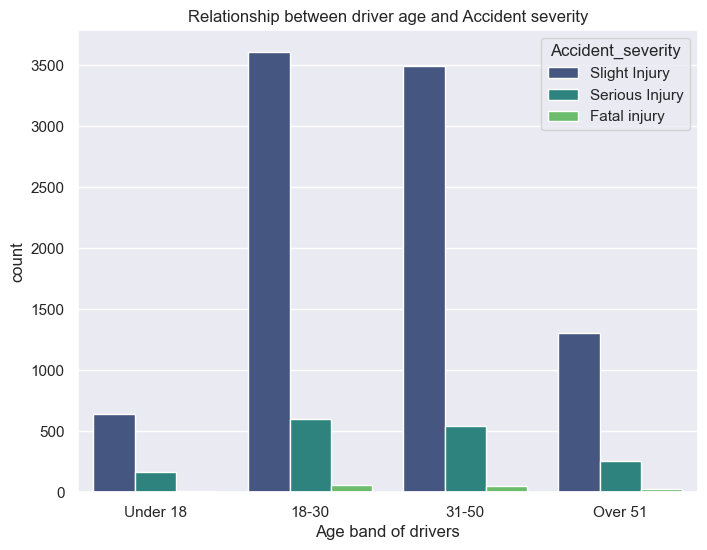

In [22]:
# Accident severity by drivers age band
order_age_band= ['Under 18', '18-30', '31-50', 'Over 51']
plt.figure(figsize=(8,6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', order=order_age_band, data=df, palette='viridis')
plt.xlabel('Age band of drivers')
plt.title('Relationship between driver age and Accident severity')
plt.show()

Drivers within the age band of 18-30 were involved in accidents the most

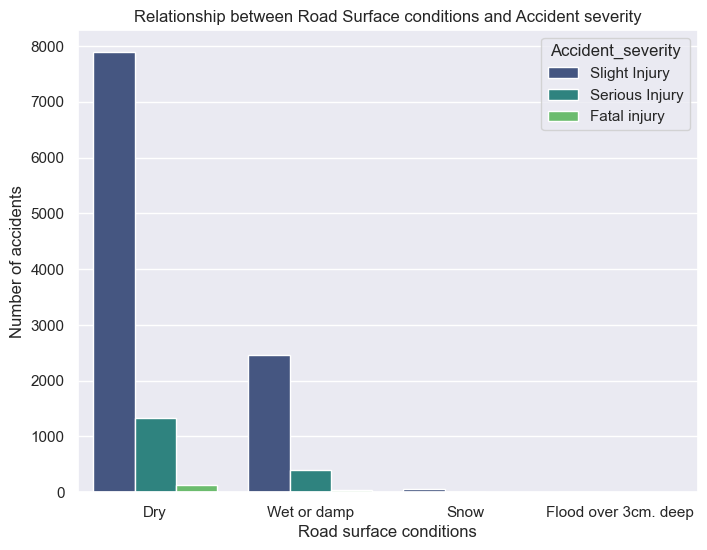

In [23]:
# Relationship between road surface conditions and accident severity
plt.figure(figsize=(8,6))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df, palette='viridis')
plt.xlabel('Road surface conditions')
plt.ylabel('Number of accidents')
plt.title('Relationship between Road Surface conditions and Accident severity')
plt.show()

Driving on dry road surfaces results in more accidents that any other road surface condition

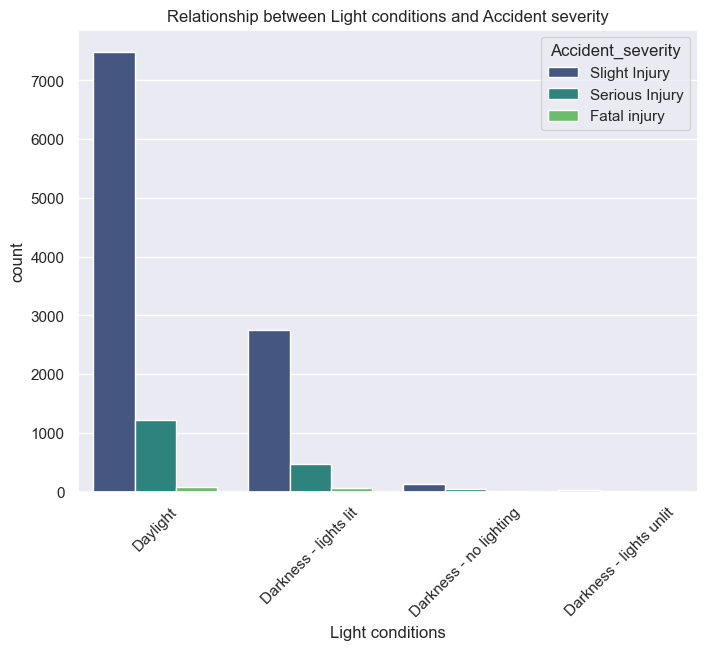

In [24]:
# Relationship between lightning conditions and accident severity
plt.figure(figsize=(8,6))
sns.countplot(x='Light_conditions', hue='Accident_severity', data=df, palette='viridis')
plt.xlabel('Light conditions')
plt.xticks(rotation=45)
#plt.ylabel('Number of accidents')
plt.title('Relationship between Light conditions and Accident severity')
plt.show()

More accidents occur in daylight

In [25]:
# Select numerical columns
numerical_cols= df.select_dtypes(include=['int64']).columns.tolist()
numerical_cols

['Number_of_vehicles_involved', 'Number_of_casualties']

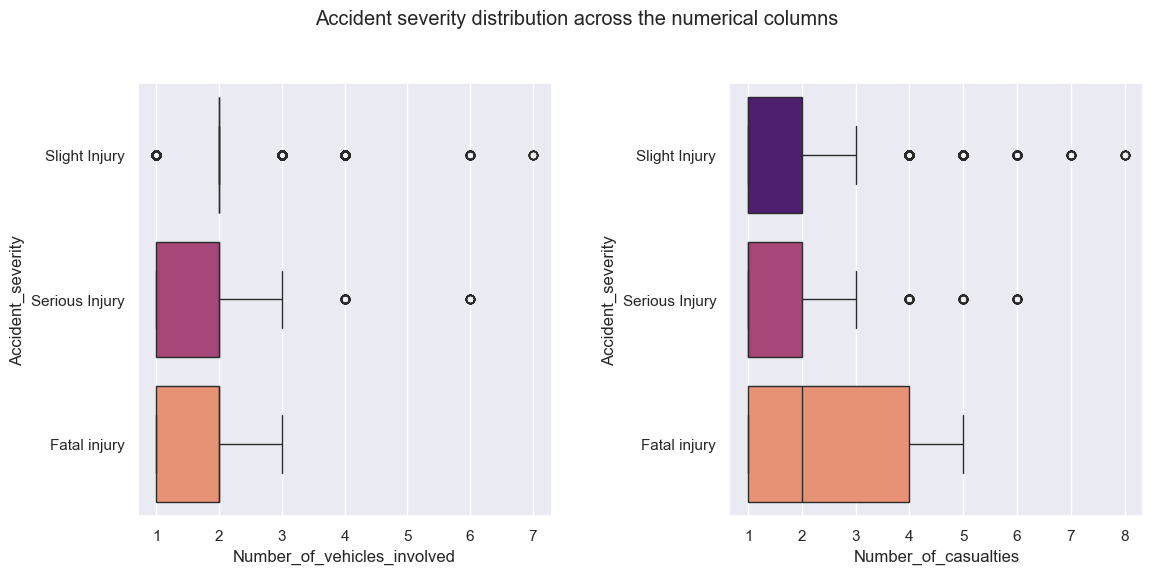

In [26]:
# Box plot to check the relationship between the numerical columns and accident severity
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(ax=ax1, x='Number_of_vehicles_involved', y= 'Accident_severity', data=df, palette='magma')
sns.boxplot(ax=ax2, x='Number_of_casualties', y= 'Accident_severity', data=df, palette='magma')
plt.suptitle('Accident severity distribution across the numerical columns')
plt.tight_layout(pad=2.0, w_pad=3.0, h_pad=2.0)
plt.show()   

#### Investigating the outliers to see the total number of outliers in each columns

In [27]:
for col in numerical_cols:
    # calculating the 25th percentile (Q1)
    Q1= df[col].quantile(0.25)
    # calculating the 75th percentile (Q3)
    Q3= df[col].quantile(0.75)

    # to find the value of the whiskers (Interquartile range)
    IQR = Q3-Q1
    lower= Q1-1.5*IQR
    upper= Q3+1.5*IQR

    #filter to identify rows with outliers based on the upper and lower thresholds
    outliers = (df[col]<lower) | (df[col]>upper)

    # Print or store the outliers
    #outliers = df[mask]
    print(f'\nColumn: {col}')
    print(f'Number of outliers: {outliers.sum()}')


Column: Number_of_vehicles_involved
Number of outliers: 3976

Column: Number_of_casualties
Number of outliers: 720



From the boxplot, it is evident that outliers exist in each column. The following will examine the outliers to see if they are useful or not:

#### Number of vehicles involved:
The slight injury category have outliers in which 7 cars are involved. This indicates that an accident involving 7 vehicles resulted in slight injuries. At first, I assumed an accident involving this number of vehicles should result in serious or even fatal injuries. While this assumption is valid, certain situations exempt this. As you are reading this, i want you to imagine a scenario of a traffic pile-up, which we all must have seen on some occasions. In this scenario, cars often move at a slow speed in congested lanes. it may take just one vehicle to hit another, setting off a chain reaction (Newton's 3rd law of motion) crash at a slow speed, which might result in minor cuts known as Slight Injuries in this case. This event is quite rare but realistic, and it also shows that all 3976 outliers observed represent true cases and should be retained. 

#### Number of casualties:
The outliers identified here are valid rather than errors. For example, the Slight injury category includes outliers where up to 8 casualties were recorded, while serious injury shows outliers with up to 6 casualties. These are valid, as it is possible for an accident involving multiple people to result in all or some of them sustaining either slight or serious injuries. Therefore, all 720 outliers should not be discarded, as they represent true events within the context of road traffic accidents.

### Time distribution of Accidents by severity level 

#### Convert time to 12-hour format (AM or PM) 

In [28]:
# Convert time to datetime
df['Time']=pd.to_datetime(df['Time'], format= '%H:%M:%S')

#df['am_pm']= df['Time'].dt.strftime('%I:%S %p')

# Extract hours from Datetime
df['hour']= df['Time'].dt.hour

For easy interpretation, i set the labels on the x axis to be in am/pm formats and also for better visualization, the time scale is set at an interval of 6hours

In [29]:
# Create a list of the different accident severities
severity_levels= ['Slight Injury', 'Serious Injury', 'Fatal injury']

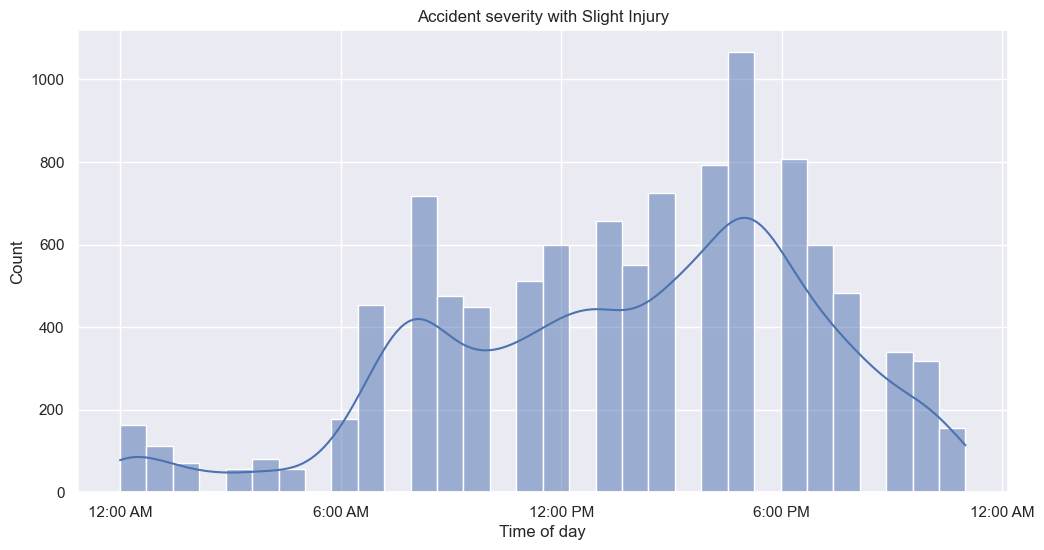

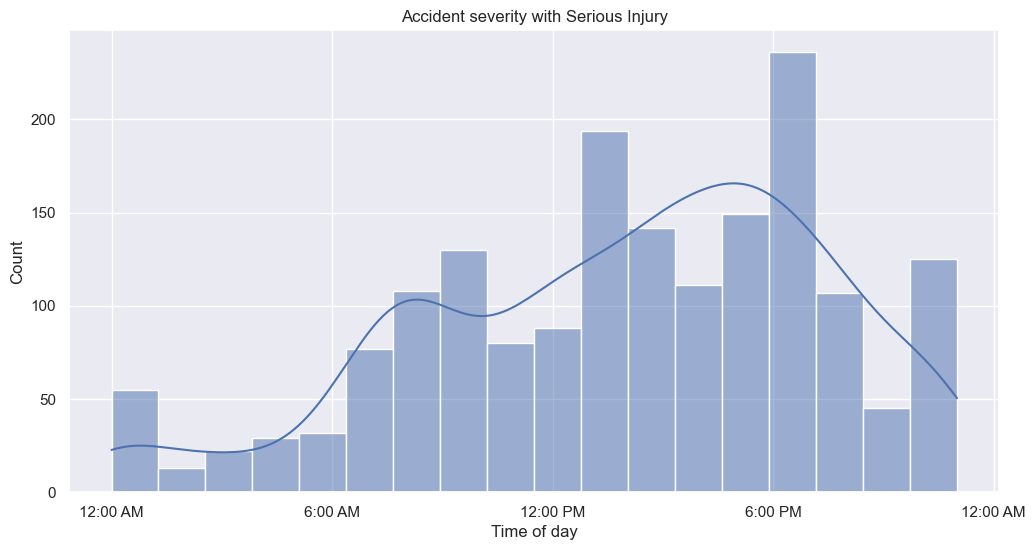

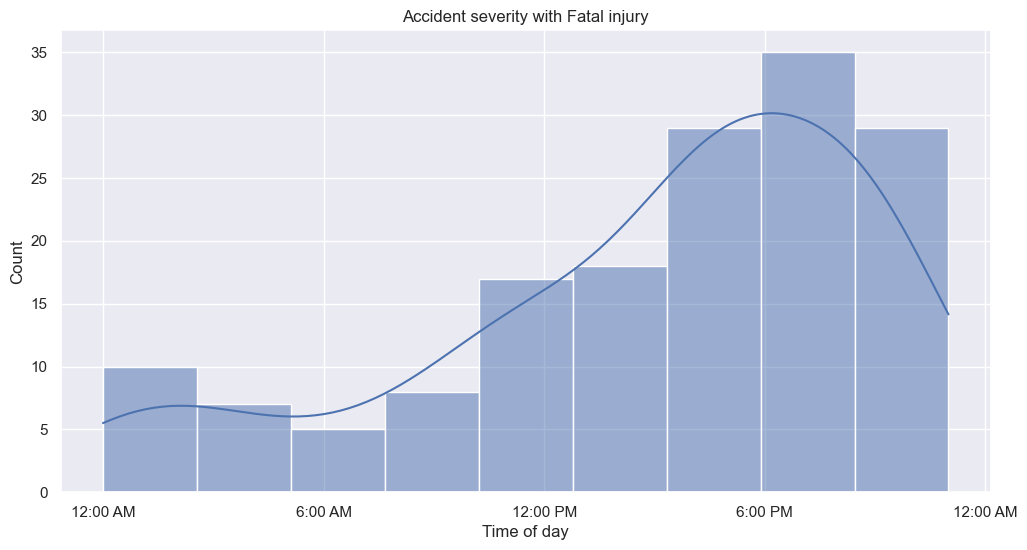

In [30]:
# Visualizing accident severity distributions across time in a typical day
x_interval_hour= np.arange(0,25,6)
x_labels_am_pm= ['12:00 AM', '6:00 AM', '12:00 PM', '6:00 PM', '12:00 AM']

for level in severity_levels:
    # filter each severity
    data=df[df['Accident_severity']==level]
    plt.figure(figsize=(12,6))
    sns.histplot(x='hour', data=data, kde=True)
    plt.xticks(x_interval_hour, x_labels_am_pm)
    plt.xlabel('Time of day')
    plt.title(f'Accident severity with {level}')
    plt.show()

All the distributions are negatively skewed. The first two distributions (Accident severity with slight injury and serious injury) are bimodal due to the presence of two distinct peaks in each.
#### Slight Injury
The first peak occurs between **3:00 AM** to **8:00 AM**, showing a spike in accidents during the early morning hours. A decline follows from **9:00 AM** to **10:00 AM**, after which there's a slight rise lasting about an hour. The number of accidents then fluctuates between **11:00 AM** and **1:00 AM**. The second peak appears between **2:00 PM** and **5:00 PM**, after which there is a steady decline in the number of slight injury cases.

#### Serious Injury
Accidents resulting in serious injuries begin to increase from **3:00 AM**, reaching the first peak around **9:00 AM**. A brief decline follows for about an hour but the numbers gradually rise again from **11:00 AM** to **6:00 PM**, indicating the second peak. After **6:00 PM**, there is a steady decline in the number of serious injury cases.

#### Fatal Injury
The number of accidents gradually increases from **3:00 AM** through to **6:00 PM**, suggesting a slow buildup of severe incidents across the day. After 6:00 PM the number of fatal injuries decline.


#### General Observation
Overall, the number of accidents across all accident categories decline during the evenings, most especially after **6:00 PM**. This might be due to less driving activity, drivers being more cautious at night.

##### Note:
All the time are estimated values from the graphs

## Feature Preprcoessing

make a copy of the dataset

In [31]:
data = df.copy()

In [32]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'hour'],
      dtype='object')

In [ ]:
#data['Casualty_density']=  data['Number_of_casualties'] / data['Number_of_vehicles_involved']

In [33]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Owner,Residential areas,Unknown,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Owner,Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1


### Feature Encoding

#### Label Encoding

In [34]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    if col != 'Accident_severity':  # Exclude target column
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

In [35]:
# Manual encoding of the target variable
Target_mapping={'Slight Injury':0, 'Serious Injury':1, 'Fatal injury':2}
data['Accident_severity']= data['Accident_severity'].map(Target_mapping)
data['Accident_severity'].value_counts()

Accident_severity
0    10415
1     1743
2      158
Name: count, dtype: int64

### Correlation Heatmap

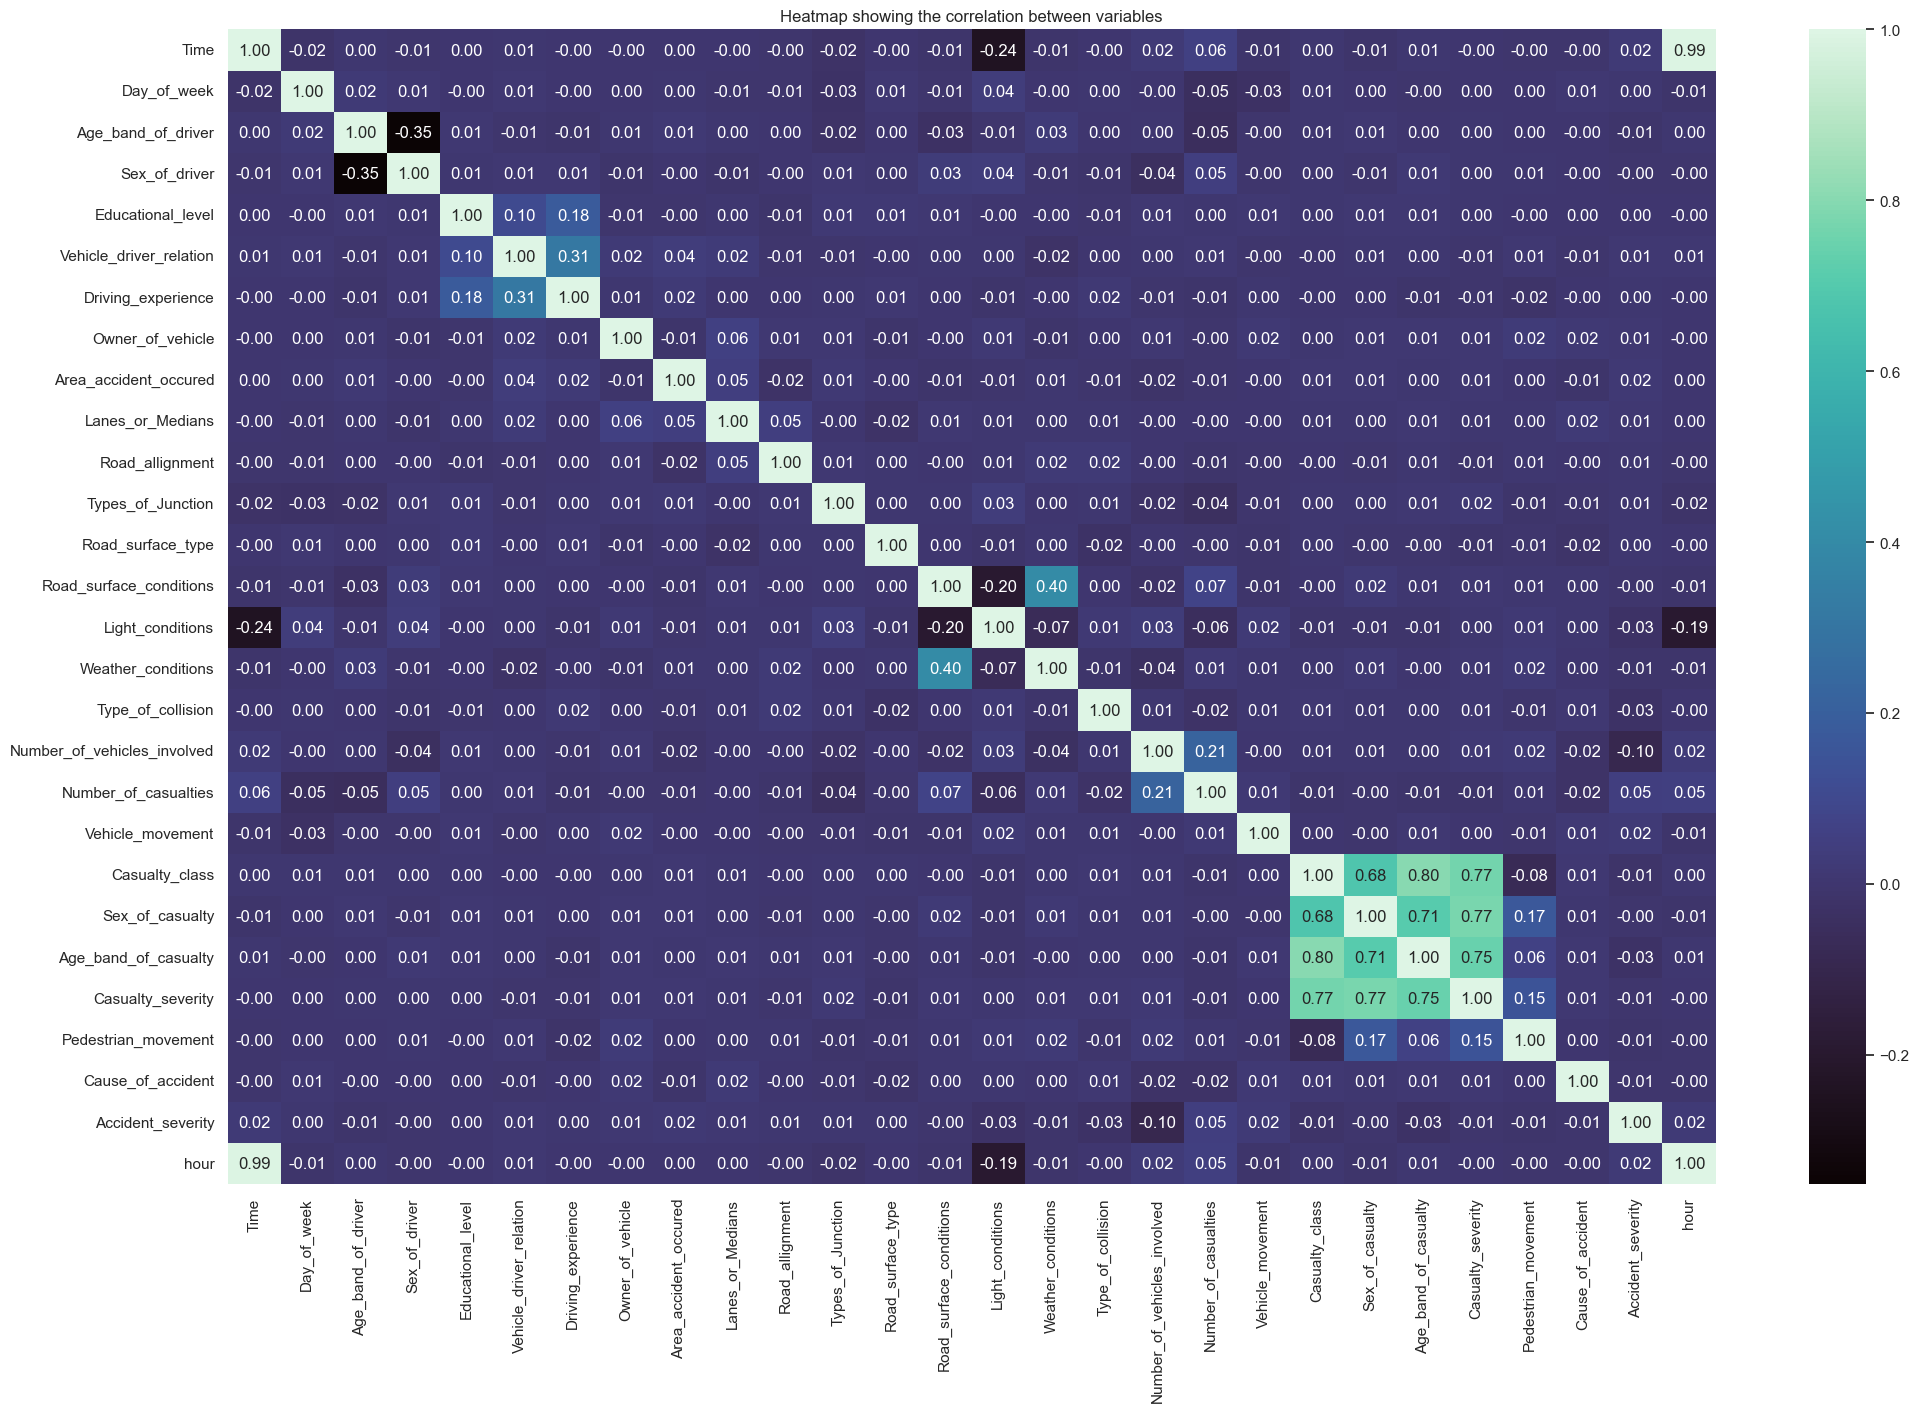

In [36]:
corr_matrix= data.corr()
plt.figure(figsize=(24,15))
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt='.2f')
plt.title('Heatmap showing the correlation between variables')
plt.show()

In [ ]:
# Correlation values between features and target
#print('Correlation values between features and targets \n')
#print(corr_matrix['Accident_severity'].sort_values(ascending=True))   

**OBSERVATION**: Casualty severity, Sex of casualty, Age band of casualty, and Casualty class are all correlated with each other. So I retained the feature with the highest correlation value with the target variable.
Age band of casualty has the highest absolute correlation with the target, and all other correlated features are dropped to avoid multicollinearity, which render the model redundant.

## Train Test Split

In [37]:
# Seperate features from target
X= data.drop(columns=['Accident_severity', 'Time', 'Casualty_severity', 'Sex_of_casualty','Casualty_class'] , axis=1) #'Casualty_class'#
y= data['Accident_severity']

# Train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

## Model Building

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Dictionary containing models
models= {'Decision Tree': DecisionTreeClassifier(random_state=42),
         'Random Forest': RandomForestClassifier(random_state=42),
         'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [39]:
# train and evaluate the models
# implement a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# loop trhough each model
for model_name, model in models.items():
    pipeline = Pipeline(
        steps=[
            ('scaler', StandardScaler()),
            ('classifier', model)]
    )

    # fit the model
    pipeline.fit(X_train, y_train)

    # make predictions on the test set
    y_pred = pipeline.predict(X_test)

    
    
    # Classification report
    print(f'Model: {model_name}')
    print('The Classification Report:\n')
    print(classification_report(y_test, y_pred))
    print('\n' + '-' *60 + '\n')

    # Confusion matrix
    #cm = confusion_matrix (y_test, y_pred)
    #sns.heatmap(cm, annot=True, fmt='d', xticklabels= labels, yticklabels= labels)
    #plt.show()
    

Model: Decision Tree
The Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2064
           1       0.29      0.31      0.30       363
           2       0.33      0.41      0.37        37

    accuracy                           0.77      2464
   macro avg       0.50      0.53      0.51      2464
weighted avg       0.78      0.77      0.77      2464


------------------------------------------------------------

Model: Random Forest
The Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2064
           1       0.93      0.04      0.07       363
           2       0.00      0.00      0.00        37

    accuracy                           0.84      2464
   macro avg       0.59      0.35      0.33      2464
weighted avg       0.84      0.84      0.78      2464


------------------------------------------------------------

Model: XGBoost

It is expected that the models would perform well on the majority class(0) since it originally has more samples than any of the other two classes. Therefore, I would concentrate on classes 1 & 2 after addressing the imbalance.

### Applying SMOTE 

In [40]:
# from the previous report, we can see that the models are biased towards the majority class (slight injury).

#from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# train test split with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# build a pipeline for each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        #('smoteen', SMOTEENN(random_state=42)),
        ('classifier', model)]
    )
   
    # fit model
    pipeline.fit(X_train, y_train)

    # predictions on test set
    y_pred= pipeline.predict(X_test)

   
    #labels=['Slight Injury', 'Serious Injury', 'Fatal Injury']
    
    # Classification Report
    print(f'Model: {model_name}')
    print('Classification Report:\n')
    print(classification_report(y_test, y_pred))
    print('\n' + '-'*60 + '\n')
    

    # Confusion matrix
    #cm = confusion_matrix (y_test, y_pred)
    #sns.heatmap(cm, annot=True, fmt='d', xticklabels= labels, yticklabels= labels)
    #plt.show()

Model: Decision Tree
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2084
           1       0.22      0.25      0.23       349
           2       0.14      0.26      0.18        31

    accuracy                           0.75      2464
   macro avg       0.41      0.45      0.42      2464
weighted avg       0.76      0.75      0.75      2464


------------------------------------------------------------

Model: Random Forest
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2084
           1       0.48      0.06      0.10       349
           2       1.00      0.13      0.23        31

    accuracy                           0.85      2464
   macro avg       0.78      0.39      0.42      2464
weighted avg       0.80      0.85      0.79      2464


------------------------------------------------------------

Model: XGBoost Classif

**Data split**: Using stratify=y ensures that both the train set and test set have the same class distribution as the original dataset. All classes are represented equally.
It also prevents the issue of poor generalization and misleading accuracy.

##### RESULTS INTERPRETATION
Class 0- Slight Injury
Class 1- Serious Injury
Class 2- Fatal Injury

Even with SMOTE, tree-based models (especially Random Forest and XGBoost) often outperform other algorithms when it comes to precision for minority classes.
To ensure robustness and generalizability, I performed cross-validation across all models. This allowed me to evaluate performance across multiple folds and reduce the risk of overfitting to a specific data split.

### Cross Validation 

In [42]:
# performing cv to see how well the models generalize to unseen data
from sklearn.model_selection import cross_val_score

# loop through the models
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f'Model: {model_name}')
    print(f'Cross validation scores: {scores}')
    print(f'The F1 Score: {np.mean(scores):.2f}')
    print('\n' + '-'*60 + '\n')

Model: Decision Tree
Cross validation scores: [0.75081164 0.74690756 0.75305192 0.75048224 0.75323076]
The F1 Score: 0.75

------------------------------------------------------------

Model: Random Forest
Cross validation scores: [0.79455799 0.78556543 0.78895845 0.79571823 0.79692681]
The F1 Score: 0.79

------------------------------------------------------------

Model: XGBoost Classifier
Cross validation scores: [0.80174163 0.79307215 0.79856276 0.80462507 0.80244703]
The F1 Score: 0.80

------------------------------------------------------------



#### Result Interpretation
After performing cross-validation on all models, XGBoost emerged as the best-performing model with an F1 score of 0.80

Based on this, XGBoost was selected for further hyperparameter tuning and model explainability.

### Hyperparameter Tuning of XGBoost Classifier

In [ ]:
#XGBClassifier().get_params()

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score

# define param grid
param_grid= {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}

# build pipeline
pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(random_state=42))]
)


random_cv= RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    cv= 5,
    scoring= 'f1_weighted',
    n_jobs= -1,
    random_state= 42
)

# fit the model with RandomizedSearchCV
random_cv.fit(X_train, y_train)

# predictions on test set
y_pred = random_cv.predict(X_test)

# Classification report
print(f'Xgboost Best Parameters: {random_cv.best_params_}')

# Evaluating the model: callculating the metrics
accuracy= accuracy_score(y_test, y_pred)
recall= recall_score(y_test, y_pred, average='weighted')
f1= f1_score(y_test, y_pred,  average='weighted')

# create an empty list to store results
results=[]


# append evaluation metrics to the result
results.append({
    'model_name': 'XGBoost',
    'Accuracy': f'{accuracy:.2f}',
    'F1 score': f'{f1:.2f}', 
    'Recall': f'{recall:.2f}'
    
})

# display results in tabular form
result_df= pd.DataFrame(results)
result_df

Xgboost Best Parameters: {'classifier__subsample': 1.0, 'classifier__n_estimators': 200, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 1.0}


,model_name,Accuracy,F1 score,Recall
0,XGBoost,0.85,0.81,0.85


After fine-tuning, XGBoost achieved an overall accuracy of 0.85 and weighted F1 score of 0.81, showing strong performance in predicting accident severity.

## SHAP for Model Interpretability

100%|===================| 7391/7392 [05:38<00:00]        

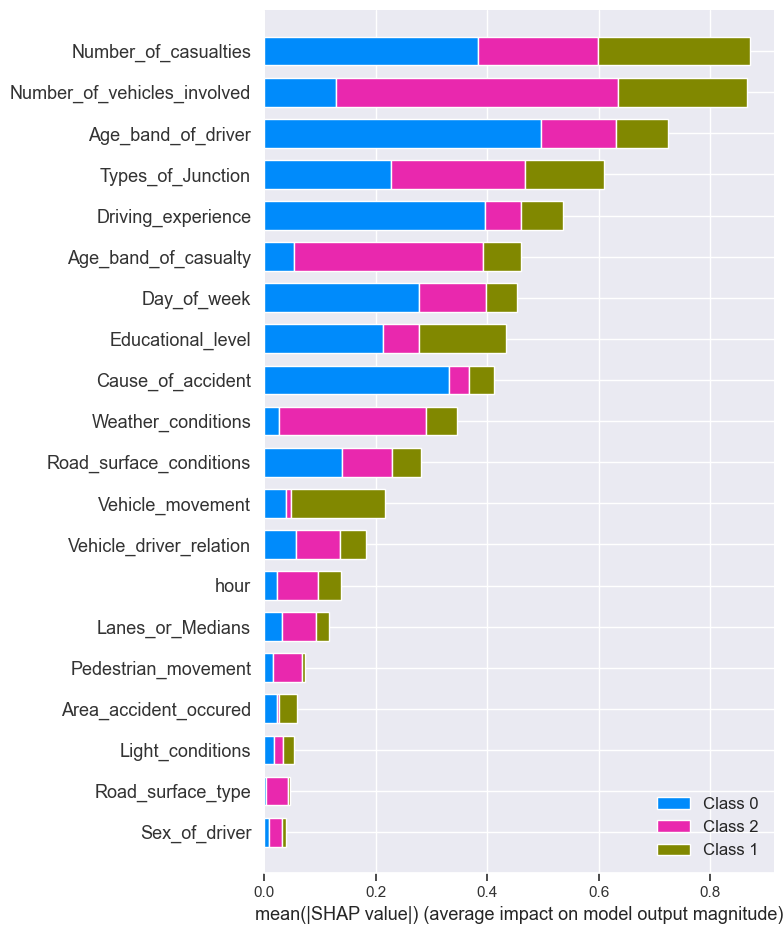

In [44]:
# Performing SHAP after hyperparameter tuning on the final best model

import shap

# Get the best estimator from the Randomizedsearch
best_pipeline = random_cv.best_estimator_

# Extract the classifier from the pipeline
xgb_best_model = best_pipeline.named_steps['classifier']


# Create SHAP explainer using the model
explainer = shap.Explainer(xgb_best_model, X_test)

# Get SHAP values
shap_values = explainer.shap_values(X_test)

# display the summary plot
#cmap= plt.get_cmap('cividis')
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, plot_type='bar')

The summary plot shows the feature importance of each feature in the model. The results show that 'Number of casualties', 'Number of vehicles involved' and 'Age band of driver' play major roles in predicting Accident severity.

## Challenges

Despite applying class balancing techniques like SMOTE, performing cross-validation, and conducting hyperparameter tuning, the XGBoost model only performed moderately in predicting the minority classes (Class 1 – Serious Injury, and Class 2 – Fatal Injury).

## Recommendations

##### - The Finetuned XGBoost should serve as the baseline for predicting accident severity in future work.
##### - Further research on feature engineering might be neccessary to enable the model to detect the minority classes  and further distinguish them.
##### - Other gradient boosting alternative like CatBoost, LightGBM and Neural networks should be explored.

